# Detecção de Anomalias

## Exemplo simulado

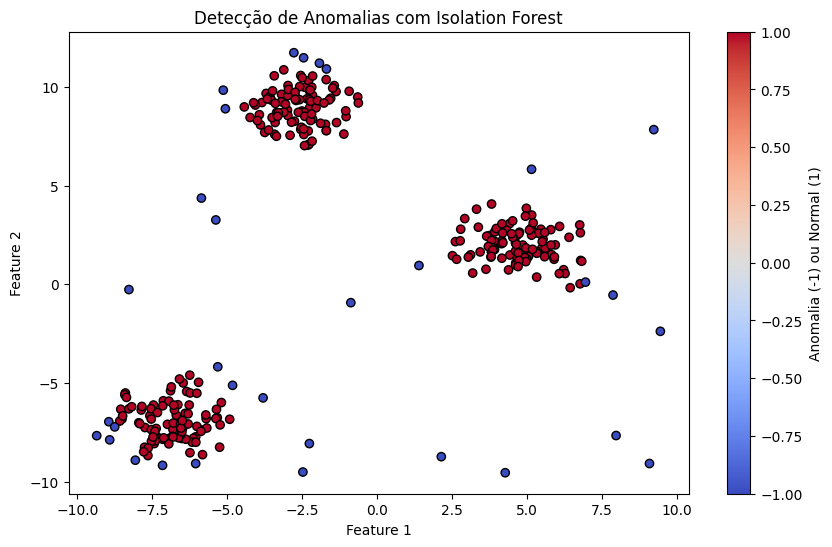

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-10, high=10, size=(20, 2))  # Criando 20 outliers aleatórios
X = np.concatenate([X, outliers], axis=0)

iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X)
y_pred = iso_forest.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', marker='o', edgecolor='k')
plt.title("Detecção de Anomalias com Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Anomalia (-1) ou Normal (1)")
plt.show()


In [2]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)
X = np.concatenate([X, np.random.uniform(low=-6, high=6, size=(20, 2))], axis=0)  # Adiciona algumas anomalias

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
one_class_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

iso_pred = iso_forest.fit_predict(X_scaled)
svm_pred = one_class_svm.fit_predict(X_scaled)
lof_pred = lof.fit_predict(X_scaled)

iso_pred = np.where(iso_pred == 1, 0, 1)
svm_pred = np.where(svm_pred == 1, 0, 1)
lof_pred = np.where(lof_pred == 1, 0, 1)

ensemble_pred = (iso_pred + svm_pred + lof_pred) >= 2  # Votação majoritária (pelo menos 2 classificadores)

ensemble_pred = np.where(ensemble_pred, 1, 0)

print("Isolation Forest Predições:", iso_pred)
print("One-Class SVM Predições:", svm_pred)
print("LOF Predições:", lof_pred)
print("Ensemble Predições (Votação Majoritária):", ensemble_pred)


Isolation Forest Predições: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
One-Class SVM Predições: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

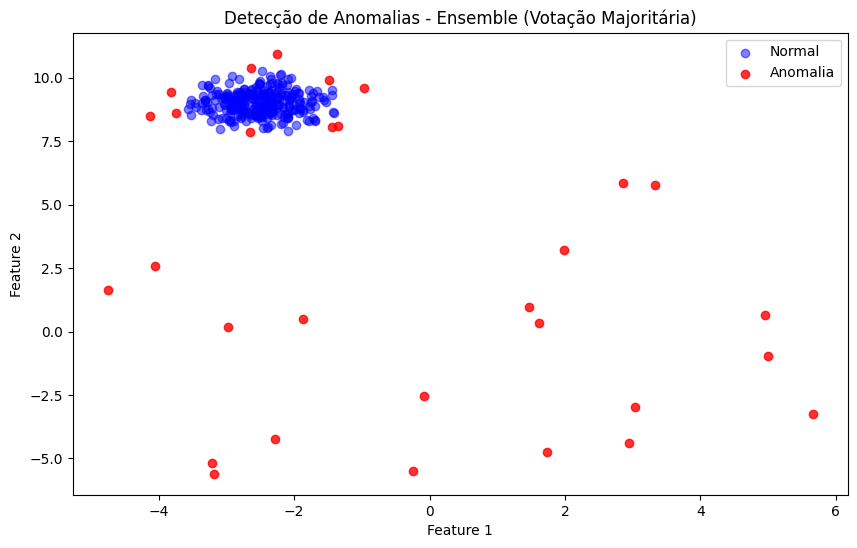

In [3]:

normal_data = X[ensemble_pred == 0]
anomalous_data = X[ensemble_pred == 1]

plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='b', label='Normal', alpha=0.5)
plt.scatter(anomalous_data[:, 0], anomalous_data[:, 1], c='r', label='Anomalia', alpha=0.8)
plt.title('Detecção de Anomalias - Ensemble (Votação Majoritária)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Importando e Pré-processamento Dataset Europeu

In [4]:
import os
import pandas as pd
pd.set_option('display.max_columns', 50)
os.chdir(r'C:\Users\decmg\OneDrive\Documentos\Material Disciplinas\MO436- Realidades Sinstéticas')

In [5]:

df = pd.read_csv('creditcard_2023.csv')


In [6]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
df.Class.value_counts(normalize=True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [18]:
df.shape

(568630, 31)

In [19]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,-1.183592e-16,-5.758017e-17,-5.698037e-18,-4.078595e-17,2.649087e-17,-1.719408e-17,-3.398829e-17,-5.837989e-17,2.479146e-17,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,-5.954723e+00,-2.020399e+00,-5.955227e+00,-2.107417e+00,-3.861813e+00,-2.214513e+00,-2.484938e+00,-2.421949e+00,-7.804988e+00,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,-7.014495e-01,-8.311331e-01,-6.966667e-01,-8.732057e-01,-6.212485e-01,-7.162655e-01,-6.194913e-01,-5.560458e-01,-5.653082e-01,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,-4.104986e-02,1.620521e-01,1.760812e-02,2.305011e-01,-3.925566e-02,1.340262e-01,2.716407e-01,8.729382e-02,-2.597869e-02,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,7.477730e-01,7.446723e-01,6.856048e-01,7.518216e-01,6.654065e-01,6.556061e-01,5.182242e-01,5.443887e-01,5.601164e-01,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,2.513573e+00,1.791356e+01,7.187486e+00,1.916954e+01,1.453220e+01,4.665291e+01,6.994124e+00,6.783716e+00,3.831672e+00,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
import pandas as pd

def normalize_features(df):
    columns_to_normalize = [f'V{i}' for i in range(1, 29)]
    
    df[columns_to_normalize] = (df[columns_to_normalize] - df[columns_to_normalize].mean()) / (df[columns_to_normalize].std() + 1e-8)
    
    return df

In [9]:
from sklearn.model_selection import train_test_split

def split_data(df, train_size=0.6, val_size=0.2, test_size=0.2, random_state=42):
    df_train, df_intermediate = train_test_split(df, train_size=train_size, random_state=random_state, stratify=df['Class'])
    
    val_test_ratio = val_size / (val_size + test_size)
    
    df_val, df_test = train_test_split(df_intermediate, train_size=val_test_ratio, random_state=random_state, stratify=df_intermediate['Class'])
    
    return df_train, df_val, df_test

df_train, df_val, df_test = split_data(df)


In [10]:
df_train = normalize_features(df_train)
df_val = normalize_features(df_val)
df_test = normalize_features(df_test)

## Modelando um único Detector

In [11]:
from sklearn.ensemble import IsolationForest

# Instancia o modelo Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Treina apenas nas transações não fraudulentas do conjunto de treino
non_fraud_train = df_train[df_train['Class'] == 0]
iso_forest.fit(non_fraud_train.drop(columns=['id', 'Class']))


IsolationForest(random_state=42)

In [12]:
# Prediz as anomalias no conjunto de validação
val_features = df_val.drop(columns=['id', 'Class'])
val_predictions = iso_forest.predict(val_features)

# Converte as previsões para o formato binário (1 = fraude, 0 = não fraude)
val_anomaly_labels = (val_predictions == -1).astype(int)

# Calcula métricas de avaliação
from sklearn.metrics import classification_report, confusion_matrix

# Avalia o desempenho no conjunto de validação
print("Avaliação no conjunto de validação:")
print(confusion_matrix(df_val['Class'], val_anomaly_labels))
print(classification_report(df_val['Class'], val_anomaly_labels))


Avaliação no conjunto de validação:
[[54818  2045]
 [21392 35471]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82     56863
           1       0.95      0.62      0.75     56863

    accuracy                           0.79    113726
   macro avg       0.83      0.79      0.79    113726
weighted avg       0.83      0.79      0.79    113726



In [26]:
# Prediz as anomalias no conjunto de teste
test_features = df_test.drop(columns=['id', 'Class'])
test_predictions = iso_forest.predict(test_features)
test_anomaly_labels = (test_predictions == -1).astype(int)

print("Avaliação no conjunto de teste:")
print(confusion_matrix(df_test['Class'], test_anomaly_labels))
print(classification_report(df_test['Class'], test_anomaly_labels))


Avaliação no conjunto de teste:
[[54738  2125]
 [21695 35168]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82     56863
           1       0.94      0.62      0.75     56863

    accuracy                           0.79    113726
   macro avg       0.83      0.79      0.78    113726
weighted avg       0.83      0.79      0.78    113726



## Otimização de Hiperparametros

In [ ]:
import optuna
from sklearn.ensemble import IsolationForest
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Divide o conjunto de treino novamente para criar um conjunto de validação para a otimização
train_features, val_features, train_labels, val_labels = train_test_split(
    df_train.drop(columns=['id', 'Class']), 
    df_train['Class'], 
    test_size=0.2, 
    stratify=df_train['Class'], 
    random_state=42
)



def objective(trial):
    # Define os hiperparâmetros a serem otimizados
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)
    max_features = trial.suggest_float('max_features', 0.5, 1.0)
    contamination = trial.suggest_float('contamination', 0.01, 0.2)
    
    # Instancia o modelo Isolation Forest com os hiperparâmetros
    iso_forest = IsolationForest(
        n_estimators=n_estimators,
        max_samples=max_samples,
        max_features=max_features,
        contamination=contamination,
        random_state=42
    )
    
    # Treina o modelo apenas em dados não fraudulentos
    non_fraud_train_features = train_features[train_labels == 0]
    iso_forest.fit(non_fraud_train_features)
    
    # Prediz no conjunto de validação
    val_predictions = iso_forest.predict(val_features)
    val_anomaly_labels = (val_predictions == -1).astype(int)
    
    # Calcula o recall para a classe de fraude (1)
    recall = recall_score(val_labels, val_anomaly_labels, pos_label=1)
    
    # O objetivo é maximizar o recall
    return recall

# Cria e executa o estudo
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Exibe os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", study.best_params)
print("Melhor valor de recall:", study.best_value)


[I 2024-11-13 16:16:29,421] A new study created in memory with name: no-name-0ae897fa-d139-4c38-a26c-0ccfb90ffca8
[I 2024-11-13 16:16:34,227] Trial 0 finished with value: 0.9090216308107157 and parameters: {'n_estimators': 105, 'max_samples': 0.782933407102795, 'max_features': 0.6912414870457253, 'contamination': 0.19787687643482263}. Best is trial 0 with value: 0.9090216308107157.
[I 2024-11-13 16:16:44,320] Trial 1 finished with value: 0.8642945072982003 and parameters: {'n_estimators': 201, 'max_samples': 0.96591347528307, 'max_features': 0.5550010671027399, 'contamination': 0.0664314575301459}. Best is trial 0 with value: 0.9090216308107157.
[I 2024-11-13 16:16:48,771] Trial 2 finished with value: 0.8617445336772378 and parameters: {'n_estimators': 98, 'max_samples': 0.5388730869512155, 'max_features': 0.8456181170907277, 'contamination': 0.06258723897975407}. Best is trial 0 with value: 0.9090216308107157.
[I 2024-11-13 16:16:51,104] Trial 3 finished with value: 0.8805908904390645

Melhores hiperparâmetros: {'n_estimators': 94, 'max_samples': 0.663096631231584, 'max_features': 0.5189162667603558, 'contamination': 0.19957309651158303}
Melhor valor de recall: 0.9168767219649452


## Retreinando com os melhores hiperparâmetros

In [13]:
# Melhores hiperparâmetros encontrados
best_params = {
    'n_estimators': 94,
    'max_samples': 0.663096631231584,
    'max_features': 0.5189162667603558,
    'contamination': 0.19957309651158303,
    'random_state': 42
}

# Instancia o modelo com os melhores parâmetros
iso_forest_optimized = IsolationForest(**best_params)

# Treina o modelo no conjunto de treino completo (apenas dados não fraudulentos)
non_fraud_train = df_train[df_train['Class'] == 0]
iso_forest_optimized.fit(non_fraud_train.drop(columns=['id', 'Class']))


IsolationForest(contamination=0.19957309651158303,
                max_features=0.5189162667603558, max_samples=0.663096631231584,
                n_estimators=94, random_state=42)

In [14]:
# Prediz as anomalias no conjunto de validação
val_features = df_val.drop(columns=['id', 'Class'])
val_predictions = iso_forest_optimized.predict(val_features)
val_anomaly_labels = (val_predictions == -1).astype(int)

# Avalia o desempenho no conjunto de validação
from sklearn.metrics import classification_report, confusion_matrix

print("Avaliação no conjunto de validação com os melhores hiperparâmetros:")
print(confusion_matrix(df_val['Class'], val_anomaly_labels))
print(classification_report(df_val['Class'], val_anomaly_labels))


Avaliação no conjunto de validação com os melhores hiperparâmetros:
[[45490 11373]
 [ 5292 51571]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     56863
           1       0.82      0.91      0.86     56863

    accuracy                           0.85    113726
   macro avg       0.86      0.85      0.85    113726
weighted avg       0.86      0.85      0.85    113726



In [ ]:
# Prediz as anomalias no conjunto de teste
test_features = df_test.drop(columns=['id', 'Class'])
test_predictions = iso_forest_optimized.predict(test_features)
test_anomaly_labels = (test_predictions == -1).astype(int)

# Avalia o desempenho no conjunto de teste
print("Avaliação no conjunto de teste com os melhores hiperparâmetros:")
print(confusion_matrix(df_test['Class'], test_anomaly_labels))
print(classification_report(df_test['Class'], test_anomaly_labels))

Avaliação no conjunto de teste com os melhores hiperparâmetros:
[[45401 11462]
 [ 5358 51505]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     56863
           1       0.82      0.91      0.86     56863

    accuracy                           0.85    113726
   macro avg       0.86      0.85      0.85    113726
weighted avg       0.86      0.85      0.85    113726



In [17]:
import optuna

# Define a função objetivo para otimização
def objective(trial):
    # Hiperparâmetros que o Optuna irá otimizar
    lr = trial.suggest_float('lr', 1e-5, 1e-2,log=True)
    hidden_dim1 = trial.suggest_int('hidden_dim1', 32, 128, step=32)
    hidden_dim2 = trial.suggest_int('hidden_dim2', 16, 64, step=16)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)

    # Redefine o modelo com os hiperparâmetros
    class Autoencoder(nn.Module):
        def __init__(self, input_dim):
            super(Autoencoder, self).__init__()
            self.encoder = nn.Sequential(
                nn.Linear(input_dim, hidden_dim1),
                nn.BatchNorm1d(hidden_dim1),
                nn.ReLU(),
                nn.Dropout(dropout_rate),
                nn.Linear(hidden_dim1, hidden_dim2),
                nn.BatchNorm1d(hidden_dim2),
                nn.ReLU(),
                nn.Dropout(dropout_rate),
                nn.Linear(hidden_dim2, 7)
            )
            self.decoder = nn.Sequential(
                nn.Linear(7, hidden_dim2),
                nn.BatchNorm1d(hidden_dim2),
                nn.ReLU(),
                nn.Dropout(dropout_rate),
                nn.Linear(hidden_dim2, hidden_dim1),
                nn.BatchNorm1d(hidden_dim1),
                nn.ReLU(),
                nn.Dropout(dropout_rate),
                nn.Linear(hidden_dim1, input_dim)
            )

        def forward(self, x):
            encoded = self.encoder(x)
            decoded = self.decoder(encoded)
            return decoded

    input_dim = X_train_tensor.shape[1]
    model = Autoencoder(input_dim=input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Configura os DataLoaders
    train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

    # Treinamento
    n_epochs = 20  # Pode ser ajustado
    best_val_loss = float('inf')

    for epoch in range(n_epochs):
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            outputs = model(batch)
            loss = criterion(outputs, batch)
            loss.backward()
            optimizer.step()

        # Validação
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                outputs = model(batch)
                loss = criterion(outputs, batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)

        # Armazena o melhor valor de perda
        if val_loss < best_val_loss:
            best_val_loss = val_loss

    return best_val_loss

# Configura o estudo do Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Mostra os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:")
print(study.best_params)


In [ ]:
# Melhores hiperparâmetros:
# {'lr': 0.0021467575841030706, 'hidden_dim1': 96, 'hidden_dim2': 64, 'dropout_rate': 0.10124488676639985}

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt

In [24]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,1.430971,-1.330500,-1.580730,-1.363454,0.287766,-1.480796,-1.520928,-1.376970,1.789103,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,0.173590,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,-0.664313,0.101604,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,0.477582,-0.461849,-0.606100,-0.395126,-0.040673,-0.370201,-0.729002,-0.251679,-0.343196,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,-0.324934,0.335215,0.464177,-0.390369,0.893881,0.477402,0.848443,0.930280,-0.481058,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


Epoch 1/200, Train Loss: 0.7572, Val Loss: 0.6396
Epoch 2/200, Train Loss: 0.5495, Val Loss: 0.5202
Epoch 3/200, Train Loss: 0.4803, Val Loss: 0.4710
Epoch 4/200, Train Loss: 0.4393, Val Loss: 0.4293
Epoch 5/200, Train Loss: 0.4106, Val Loss: 0.4079
Epoch 6/200, Train Loss: 0.3869, Val Loss: 0.3925
Epoch 7/200, Train Loss: 0.3692, Val Loss: 0.3758
Epoch 8/200, Train Loss: 0.3551, Val Loss: 0.3556
Epoch 9/200, Train Loss: 0.3416, Val Loss: 0.3518
Epoch 10/200, Train Loss: 0.3324, Val Loss: 0.3391
Epoch 11/200, Train Loss: 0.3237, Val Loss: 0.3303
Epoch 12/200, Train Loss: 0.3169, Val Loss: 0.3201
Epoch 13/200, Train Loss: 0.3099, Val Loss: 0.3106
Epoch 14/200, Train Loss: 0.3047, Val Loss: 0.3060
Epoch 15/200, Train Loss: 0.2986, Val Loss: 0.3108
Epoch 16/200, Train Loss: 0.2954, Val Loss: 0.2941
Epoch 17/200, Train Loss: 0.2912, Val Loss: 0.2959
Epoch 18/200, Train Loss: 0.2901, Val Loss: 0.2986
Epoch 19/200, Train Loss: 0.2848, Val Loss: 0.2927
Epoch 20/200, Train Loss: 0.2829, Val Lo

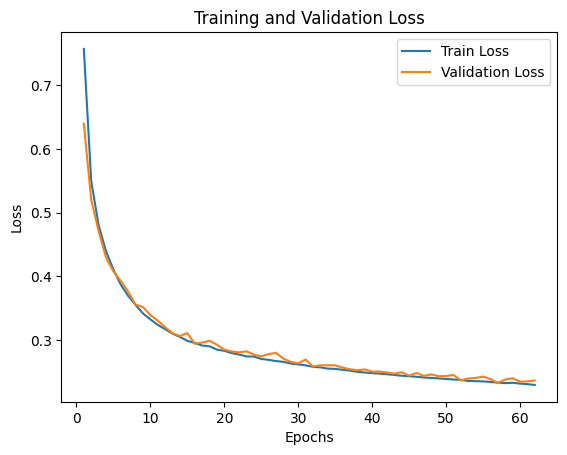

Avaliação no conjunto de teste:
[[53916  2947]
 [ 7692 49171]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     56863
           1       0.94      0.86      0.90     56863

    accuracy                           0.91    113726
   macro avg       0.91      0.91      0.91    113726
weighted avg       0.91      0.91      0.91    113726



In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt

# Prepara os dados
def prepare_data(df):
    non_fraud = df[df['Class'] == 0]
    fraud = df[df['Class'] == 1]
    
    X_non_fraud = non_fraud.drop(columns=['id', 'Class'])
    X_fraud = fraud.drop(columns=['id', 'Class'])
    
    scaler = StandardScaler()
    X_non_fraud_scaled = scaler.fit_transform(X_non_fraud)
    X_fraud_scaled = scaler.transform(X_fraud)
    
    return X_non_fraud_scaled, X_fraud_scaled, scaler

# Carrega e prepara os dados
X_non_fraud, X_fraud, scaler = prepare_data(df_train)

# Divide o conjunto de treino e validação
X_train_tensor = torch.tensor(X_non_fraud, dtype=torch.float32)
train_data, val_data = random_split(X_train_tensor, [int(0.8 * len(X_train_tensor)), len(X_train_tensor) - int(0.8 * len(X_train_tensor))])

# Define o Autoencoder com os melhores hiperparâmetros encontrados
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 96),
            nn.BatchNorm1d(96),
            nn.ReLU(),
            nn.Dropout(0),  # Dropout com o valor otimizado
            nn.Linear(96, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0),
            nn.Linear(64, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0),
            nn.Linear(16, 7)
        )
        self.decoder = nn.Sequential(
            nn.Linear(7, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0),
            nn.Linear(16, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0),
            nn.Linear(64, 96),
            nn.BatchNorm1d(96),
            nn.ReLU(),
            nn.Dropout(0),
            nn.Linear(96, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Inicializa o modelo, a função de perda e o otimizador com a taxa de aprendizado otimizada
input_dim = X_train_tensor.shape[1]
model = Autoencoder(input_dim=input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0002)

# Configura os DataLoaders
train_loader = DataLoader(train_data, batch_size=256, shuffle=True)
val_loader = DataLoader(val_data, batch_size=256, shuffle=False)

# Parâmetros para Early Stopping
n_epochs = 200
patience = 5  # Número de épocas sem melhoria na validação antes de parar
best_val_loss = float('inf')
epochs_no_improve = 5

# Variáveis para armazenar o histórico de perda
train_losses = []
val_losses = []

# Treinamento com Early Stopping
for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # Validação
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            outputs = model(batch)
            loss = criterion(outputs, batch)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    
    # Checa o Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping!")
            break

    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# Plot do histórico da perda
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Define o limiar para detecção de anomalias com base no erro de reconstrução
model.eval()
with torch.no_grad():
    reconstructions = model(X_train_tensor)
    mse = torch.mean((X_train_tensor - reconstructions) ** 2, dim=1)
    threshold = torch.quantile(mse, 0.95).item()  # Limiar baseado no percentil 95 (ajustável)

# Função para detectar anomaliasbb
def detect_anomalies(model, data, threshold):
    model.eval()
    with torch.no_grad():
        reconstructions = model(data)
        mse = torch.mean((data - reconstructions) ** 2, dim=1)
    return (mse > threshold).int()

# Avaliação no conjunto de teste
X_test = df_test.drop(columns=['id', 'Class'])
y_test = df_test['Class']

# Normaliza o conjunto de teste usando o scaler dos dados de treino
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

# Detecta anomalias no conjunto de teste
y_pred = detect_anomalies(model, X_test_tensor, threshold)

# Avalia o desempenho
print("Avaliação no conjunto de teste:")    
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

## Ensemble

In [33]:
# Predições do Autoencoder no conjunto de validação
val_data_tensor = torch.tensor(val_features.values, dtype=torch.float32)

model.eval()
with torch.no_grad():
    val_reconstructions = model(val_data_tensor)
    val_mse = torch.mean((val_data_tensor - val_reconstructions) ** 2, dim=1)
    # Limiar do Autoencoder baseado no percentil 95 (ou o valor previamente calculado)
    ae_threshold = threshold
    ae_anomaly_labels = (val_mse > ae_threshold).int().numpy()


In [ ]:
# ensemble_predictions = (val_anomaly_labels | ae_anomaly_labels)
ensemble_predictions = (val_anomaly_labels & ae_anomaly_labels) # recomendo usar esse ou o abaixo( que pondera pelos pesos), o acima por maioria está péssimo e isso faz sentido porque só tem 2 votantes.


# # Exemplo de pesos
# weight_iso = 0.5
# weight_ae = 0.5

# # Combinação por média ponderada
# ensemble_scores = (weight_iso * val_anomaly_labels) + (weight_ae * ae_anomaly_labels)
# ensemble_predictions = (ensemble_scores > 0.5).astype(int)



In [45]:
print("Avaliação no conjunto de validação do Ensemble:")
print(confusion_matrix(df_val['Class'], ensemble_predictions))
print(classification_report(df_val['Class'], ensemble_predictions))


Avaliação no conjunto de validação do Ensemble:
[[45490 11373]
 [ 5292 51571]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     56863
           1       0.82      0.91      0.86     56863

    accuracy                           0.85    113726
   macro avg       0.86      0.85      0.85    113726
weighted avg       0.86      0.85      0.85    113726



In [47]:
# Predições do Isolation Forest no conjunto de teste
test_features = df_test.drop(columns=['id', 'Class'])
test_predictions = iso_forest_optimized.predict(test_features)
test_anomaly_labels = (test_predictions == -1).astype(int)

In [48]:
# Predições do Autoencoder no conjunto de teste
test_data_tensor = torch.tensor(test_features.values, dtype=torch.float32)

model.eval()
with torch.no_grad():
    test_reconstructions = model(test_data_tensor)
    test_mse = torch.mean((test_data_tensor - test_reconstructions) ** 2, dim=1)
    ae_test_anomaly_labels = (test_mse > ae_threshold).int().numpy()


In [ ]:
# Ensemble no conjunto de teste usando votação majoritária
ensemble_test_predictions = (test_anomaly_labels & ae_test_anomaly_labels)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

# Rótulos reais do conjunto de teste
test_labels = df_test['Class']

# Avaliação do ensemble no conjunto de teste
print("Avaliação no conjunto de teste com o Ensemble:")
print(confusion_matrix(test_labels, ensemble_test_predictions))
print(classification_report(test_labels, ensemble_test_predictions))


Avaliação no conjunto de teste com o Ensemble:
[[45401 11462]
 [ 5358 51505]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     56863
           1       0.82      0.91      0.86     56863

    accuracy                           0.85    113726
   macro avg       0.86      0.85      0.85    113726
weighted avg       0.86      0.85      0.85    113726

